In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_excel('2017_Guardrail_Sections.xlsx')
df.head()

,Image Collection Date,Division,County Name,Route Code,Begin Longitude,Begin Latitude,End Longitude,End Latitude,Route,Pathweb Begin Mile Point,Pathweb End Mile Point,Direction,Type,Location,Length,Post Material,Construction
0,2017-02-04,3,New Hanover,29400017,-77.921317,34.237542,-77.921576,34.237513,29400017065,10.002,10.017,I,Other,Left,77.03,Other/NA,No
1,2017-02-04,3,New Hanover,29400017,-77.921387,34.237709,-77.921641,34.237699,29400017065,10.005,10.019,I,Other,Right,76.14,Other/NA,No
2,2017-02-04,3,New Hanover,20400421,-77.899583,34.060499,-77.899646,34.058912,20400421065,21.315,21.424,I,W-Beam,Right,578.99,Metal,No
3,2017-02-04,3,New Hanover,20400421,-77.899644,34.058912,-77.899848,34.053241,20400421065,21.424,21.817,I,Other,Right,2072.98,Other/NA,No
4,2017-02-04,3,New Hanover,20400421,-77.899847,34.053239,-77.899917,34.052388,20400421065,21.817,21.877,I,W-Beam,Right,313.01,Metal,No


The Length column is the length in feet of the guardrail.  If you do end-begin * 5280 you get something pretty close to Length.

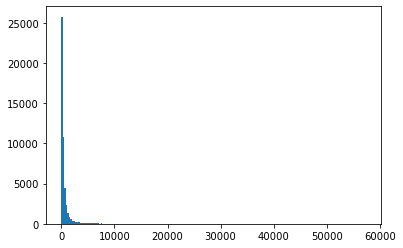

In [59]:
#most are short
plt.hist(df['Length'],bins=200)
plt.show()

In [69]:
routes = df.groupby('Route')

In [70]:
#How long is each route?  we don't know, but it's at least as long as the largest endpoint
# which might be in either the begin or end column
routelengths = routes.max()[["Pathweb Begin Mile Point","Pathweb End Mile Point"]]
routelengths['RouteLengthEstimate'] = routelengths.max(axis=1)

In [74]:
total_guardrail_length_feet = routes.sum()['Length']

In [75]:
#should work because of the index...
routelengths['GuardRailLength'] = total_guardrail_length_feet

In [76]:
routelengths

,Pathweb Begin Mile Point,Pathweb End Mile Point,RouteLengthEstimate,GuardRailLength
Route,,,,
10000026011,29.108,29.095,29.108,73264.08
10000026045,17.209,28.590,28.590,82036.73
10000026057,12.570,12.570,12.570,89170.66
10000026075,13.114,13.121,13.121,97897.46
10000040001,15.742,15.894,15.894,107853.28
...,...,...,...,...
50400918041,5.213,5.332,5.332,631.06
50400973041,0.645,0.690,0.690,410.97
70000900010,1.087,1.393,1.393,3234.01


In [77]:
routelengths['fraction_guardrail'] = routelengths['GuardRailLength'] / 5280 / routelengths['RouteLengthEstimate'] /2 

In [78]:
routelengths

,Pathweb Begin Mile Point,Pathweb End Mile Point,RouteLengthEstimate,GuardRailLength,fraction_guardrail
Route,,,,,
10000026011,29.108,29.095,29.108,73264.08,0.238350
10000026045,17.209,28.590,28.590,82036.73,0.271725
10000026057,12.570,12.570,12.570,89170.66,0.671773
10000026075,13.114,13.121,13.121,97897.46,0.706546
10000040001,15.742,15.894,15.894,107853.28,0.642593
...,...,...,...,...,...
50400918041,5.213,5.332,5.332,631.06,0.011208
50400973041,0.645,0.690,0.690,410.97,0.056402
70000900010,1.087,1.393,1.393,3234.01,0.219850


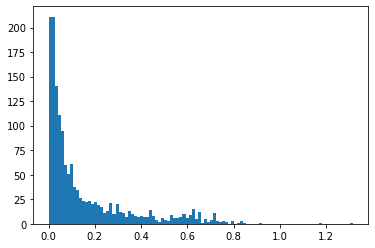

In [81]:
plt.hist(routelengths['fraction_guardrail'],bins=100)
plt.show()

In [83]:
#Not per route, just overall
sum_over_routes = routelengths.sum()
sum_over_routes['GuardRailLength'] / 5280 / sum_over_routes['RouteLengthEstimate'] /2 

0.13650659322686218